In [1]:
%matplotlib inline
%config InlineBackend.figure_format='retina'
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import Image, display_html, display, Math, HTML

# Error Rate and False Discovery

## Review Family-Wise Error Rate
Last class we learned about the family-wise error rate (FWER), which is the probability that that we make one or more false positive errors across many hypothesis tests.

We then saw that Bonferroni correction, where we divide the *p*-value threshold you would normally use by the total number of hyptheses being tested to control the FWER, is a good but conservative method to control FWER when testing many hypotheses.

## The p-value Histogram
Given what we saw with Bonferroni correction, maybe there's a better way to control for false positives? One great first step towards understanding how many false positives there might be among the hyphothesis that you tested is to actually plot the distribution of *p*-values with a *p*-value histogram.

This plot will include all your *p*-values, meaning ones for which the null hypothesis is true and for which it is not true, and you can visually see the proportion of those in this type of plot.

In that XCKD example with the jellybeans, they most likely saw a distribution of *p*-values that looks like this:

<center>
    
<img src="images/uniform-pval-dist.png" width="500px">
    
</center>
<center>
<sup>David Robinson - Variance Explained</sup>
</center>

There are some *p*-values < 0.05, but there are an equal number of every other *p*-value. Do you really believe these low *p*-values are anything more than chance? In fact, the definition of *p*-values tells us that there should exactly be a 5% chance of seeing a *p*-value less than 0.05 under the null hypthesis (and so on for other thresholds).

On the other hand, you might see a distribution of *p*-values that looks like this, where there is an enrichment for small *p*-values:

<center>

<img src="images/enriched-pval-dist.png" width="400px">

</center>
<center>
<sup>David Robinson - Variance Explained</sup>
</center>

This is ideal! The uniform portion of this distribtion is actually exactly the null *p*-values, and everything other than that is the alternative.

<center>

<img src="images/enriched-pval-dist-color.png" width="500px">
    
</center>
<center>
    <sup>David Robinson - Variance Explained</sup>
</center>

Just visually examining this, you can see that there are plenty of null hypthesis with low *p*-values still (false positives) and some alternative hypotheses with high *p*-values (false negatives).

There are of course other distbutions of p-values you might observe, but rather than showing you that there is or isn't enrichment for low *p*-values, these may indicate you're actually testing the wrong hypothesis:

<center>

<img src="images/other-pval-dist.png" width="400px">
    
</center>
<center>
<sup>David Robinson - Variance Explained</sup>
</center>

(Possible explanations: could be using a one-sided test when a two-sided test is appropriate, or the data may only allow for a certain subset of possible *p*-values).


## The False Discovery Rate
So we saw before visually that you can see the number of null hypotheses and alternative hypotheses at any given *p*-value. Could we use this property to directly control for the number of false positives?

Recall our notation from before:

|Test vs reality | Null hypothesis is true | ...is false | Total |
| --- | --- | --- | --- |
|Rejected | V | S | R |
|Not rejected | U | T | m−R |
|Total | m<sub>0</sub> | m−m<sub>0</sub> | m |

The false discovery rate (FDR) is defined as:

$$
\text{FDR} = E\left[\frac{V}{R}\right]
$$


Lets imagine that one p-value distrubition turned out looking like this:

<center>

<img src="images/pval-dist-FDR.png" width="600px">

</center>

<center>
<sup>MSMB</sup>
</center>

If we say we want to reject all null hypotheses at *p* < 0.025 (those left of the vertical red line) we can imagine a horizontal line such that most of the null hyptheses we observe are below it.

<center>
    
<img src="images/pval-dist-FDR-lines.png" width="300px">
    
</center>

We can then compute the FDR as the number of *p*-values left of the red line and below the blue line over the number total left of the red line. This results in an FDR of about 0.2 at a *p* < 0.025. 

Another way to say that is that we can expect about 20% of our positives to be false positives if we set the *p*-value threshold at 0.025.

## Controlling the False Discovery Rate
So could we then fix the FDR instead of the *p*-value threshold? This can be directly done using the **Benjamini-Hochberg** algorithm. It simply does the following:
1. Order the *p*-values in increasing order from $p_1$ to $p_m$
2. For a target FDR $\phi$, find the largest value k that satisifes $p_k <= \phi \frac{k}{m}$
3. Reject hypotheses 1 to k

It's that simple! This explicitly identifies a $p$-value theshold that controls the false disovery rate.

#### Example
Consider the following set of p-values:

In [2]:
p_values = np.array([.4,.15,.5,.0005,.6,.001,.7,.005,.8, .01,.9,.05,1,.1, .2,.3])

Lets plot the *p*-value histogram:

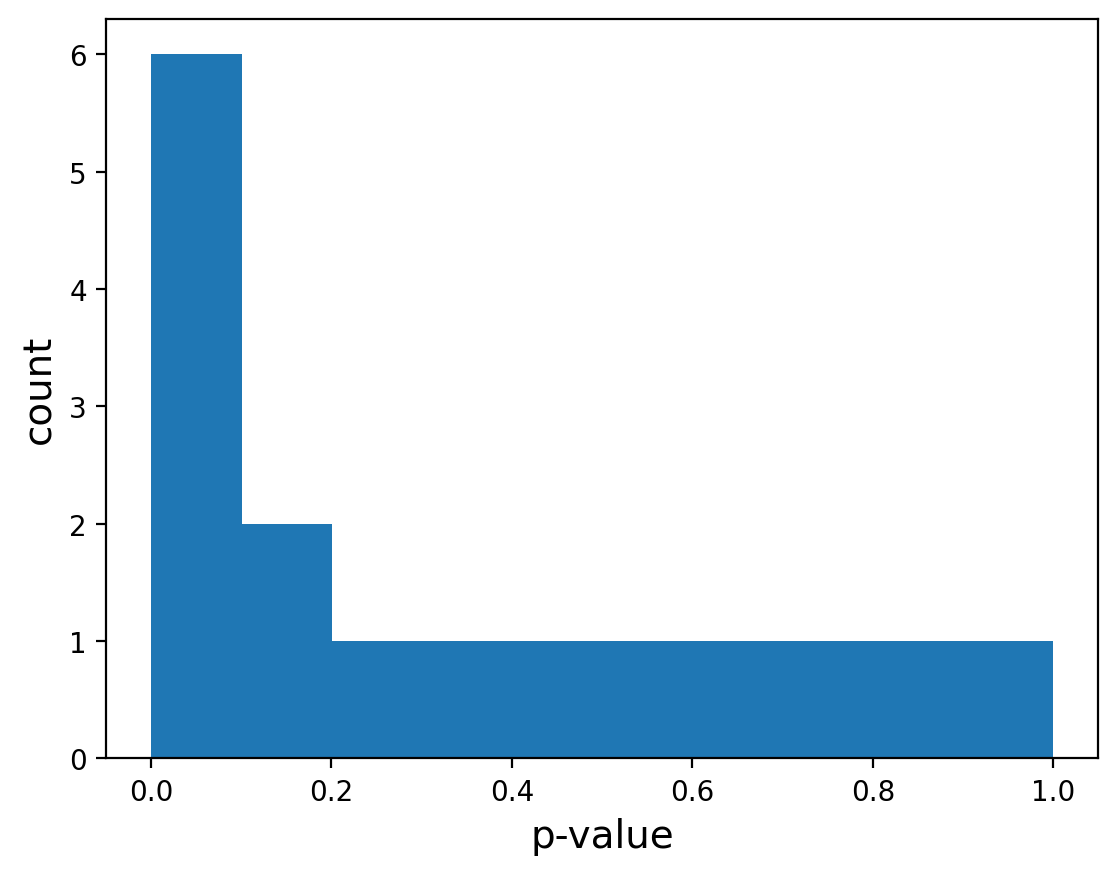

In [3]:
plt.figure()
plt.hist(p_values)
plt.xlabel('p-value', size=14)
plt.ylabel('count', size=14);

Great, it looks like we have an enrichment for small p-values over a uniform distribution. 

Let's run the Benjamini-Hochberg procedure with a target FDR of 0.1.

In [4]:
# Sort the p-values
p_values = np.sort(p_values)

# Check if values satisfy 0.1 * k / m
k = 1
while(p_values[k] < 0.1*k/len(p_values)):
    k = k+1

#reject 1 to k
print(k, p_values[k])


4 0.05


So in this case, for a FDR threshold of 0.1 we reject all $p$-values at a threshold of 0.05. By design, we **expect** 10% of those hypotheses to be false positives.